Project 4
Robert Rosen
SUBMITTED WITH THIS FILE IS A WORD DOC WITH THE IMAGES.

The following report summarizes the findings from the K-means, DBSCAN, and GMM unsupervised clustering models to segment a customer base and to tailor effective marketing campaigns to those segments found to exist.  
Data visualization showed that the age distribution had a right-side tail which was taken care of during the normalization process.  There were no missing values found in the data set during preprocessing.  And correlations between the features did find one interesting and useful  correlation.  A negative correlation (-.32) between Age and Spending Score.  
Using the K-Means clustering model, I determined that 6 clusters were the optimal number for the data set.  The image shows the 6 distinct clusters in 2D space using PCA.  Because the clusters are quite distinct, this suggests K-Means was effective.  
   
Silhouette and Inertia scores for the K-Means were .428 and 133.87 respectively.  These scores suggest reasonable structure had been with compactness in each cluster.   I used k values of 2 thru 10 to fine tune the model.  Six clusters were proven to be the optimal number.  The second attempt at fine tuning, I used Dimension Reduction.  Using the first 3 principal components captured the most variance.  Silhouette and Inertia scores remained relatively unchanged at .428 and 133.87 respectively.
DBSCAN and GMM did not improve upon the K-Means model.  Below are the best cluster visualizations based on PCA for both the DBSCAN and GMM models.
  
The PC1 vs PC2 component combination of the 3 possible was the best choice for both models.  And as can be seen, the DBSCAN produced the worst result of the 3 models.  
Lastly, below is a table showing who populates each cluster.  

For clusters 1, 2, and 3, the ages range from 25 to 32 years old.  For these clusters I would recommend using social media to engage with them.  Clusters 0, 4 and 5 are a different generation.  I would consider direct mail and other traditional methods of engaging with those customers.   For the clusters that showed high spending scores, clusters 1 and 3, premium products should be introduced while engaging them.  The other clusters, I  would recommend more value for the money, or bigger bang for the buck products. Lastly, I would recommend loyalty strategy for all the clusters.  








In [ ]:
import pandas as pd
from tqdm.auto import tqdm

# Load the data
file_path = 'customers.csv'
customers_df = pd.read_csv(file_path)

# Display the head of the dataframe
tqdm.pandas(desc='Loading and displaying head of customers data')
head = customers_df.head()

# Show the head of the dataframe
print(head)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Data Visualization and Preprocessing.
Age Distribution
: This histogram shows the frequency of different age groups within the dataset.
Spending Score Distribution
: This histogram displays how the spending scores are distributed among the customers.
These visualizations can help us understand the demographics of the customers and their spending behavior.

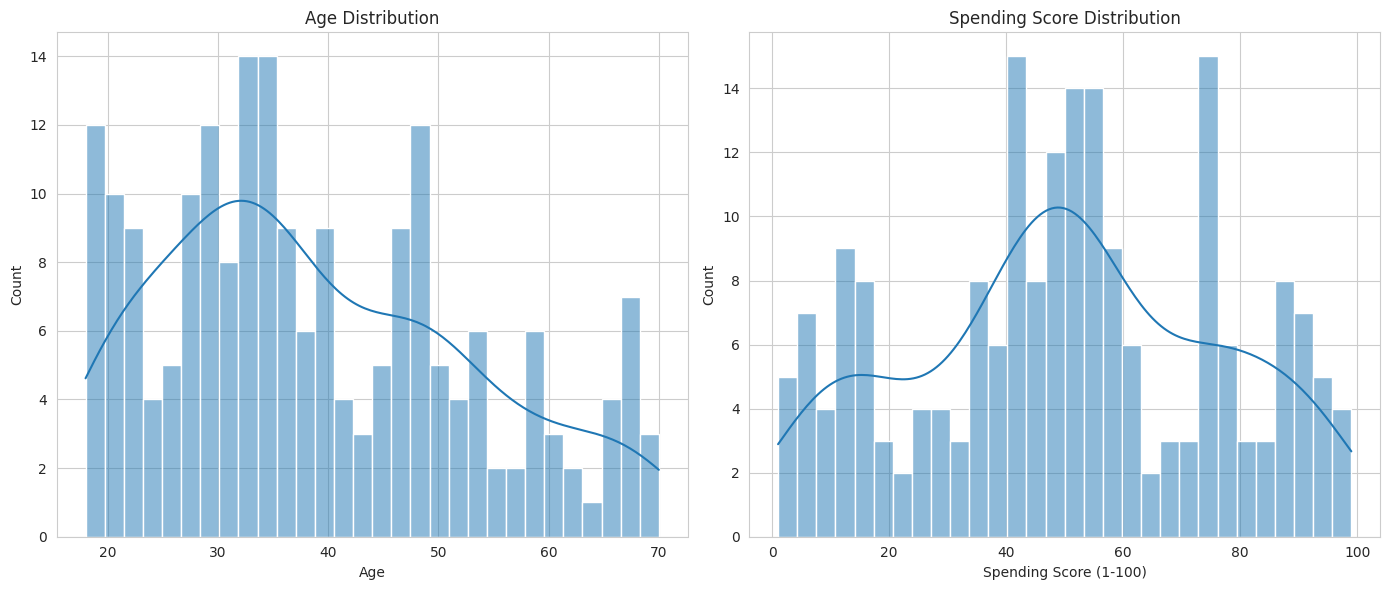

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting distributions of numerical data
plt.figure(figsize=(14, 6))

# Distribution of Age
plt.subplot(1, 2, 1)
sns.histplot(customers_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

# Distribution of Spending Score
plt.subplot(1, 2, 2)
sns.histplot(customers_df['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Spending Score Distribution')

# Show the plots
plt.tight_layout()
plt.show()

Check for missing values

In [ ]:
# Data Preprocessing

# Check for missing values
missing_values = customers_df.isnull().sum()

# Summary statistics for numerical features
describe = customers_df.describe()

# Output the missing values and summary statistics
print('Missing values:\n', missing_values)
print('\nSummary statistics for numerical features:\n', describe)

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Summary statistics for numerical features:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


The dataset has no missing values, and the summary statistics provide an overview of the numerical features.  Next, I explored the gender distribution and normalized the numerical features.  Lastly, I checked for correlations.

In [ ]:
# Explore Categorical Data

# Analyzing the 'Gender' distribution
gender_distribution = customers_df['Gender'].value_counts()

# Output the gender distribution
print(gender_distribution)

# Encode the 'Gender' categorical variable
# We will use label encoding for the 'Gender' feature
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
customers_df['Gender'] = label_encoder.fit_transform(customers_df['Gender'])

# Output the head to show the encoded feature
print('\nEncoded Gender feature:\n', customers_df.head())


from sklearn.preprocessing import StandardScaler

# Data Normalization
# Initialize the StandardScaler
scaler = StandardScaler()

# Columns to be normalized
columns_to_normalize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Apply normalization on the numerical features
customers_df[columns_to_normalize] = scaler.fit_transform(customers_df[columns_to_normalize])

# Check for any significant correlations between features
feature_correlation = customers_df[columns_to_normalize].corr()

# Output the normalized features and the correlation matrix
print('Normalized features head:\n', customers_df.head())
print('\nFeature Correlation Matrix:\n', feature_correlation)

0    112
1     88
Name: Gender, dtype: int64

Encoded Gender feature:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40
Normalized features head:
    CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1       1 -1.424569           -1.738999               -0.434801
1           2       1 -1.281035           -1.738999                1.195704
2           3       0 -1.352802           -1.700830               -1.715913
3           4       0 -1.137502           -1.700830                1.040418
4           5       0 -0.563369           -1.662660               -0.395980

Feature Correlation

Model Builing Section

Below:  

Here are the visualizations for the preprocessed data:
The first chart shows the normalized distribution of customers' ages.
The second chart displays the normalized distribution of customers' annual incomes. The third chart illustrates the normalized distribution of customers' spending scores.


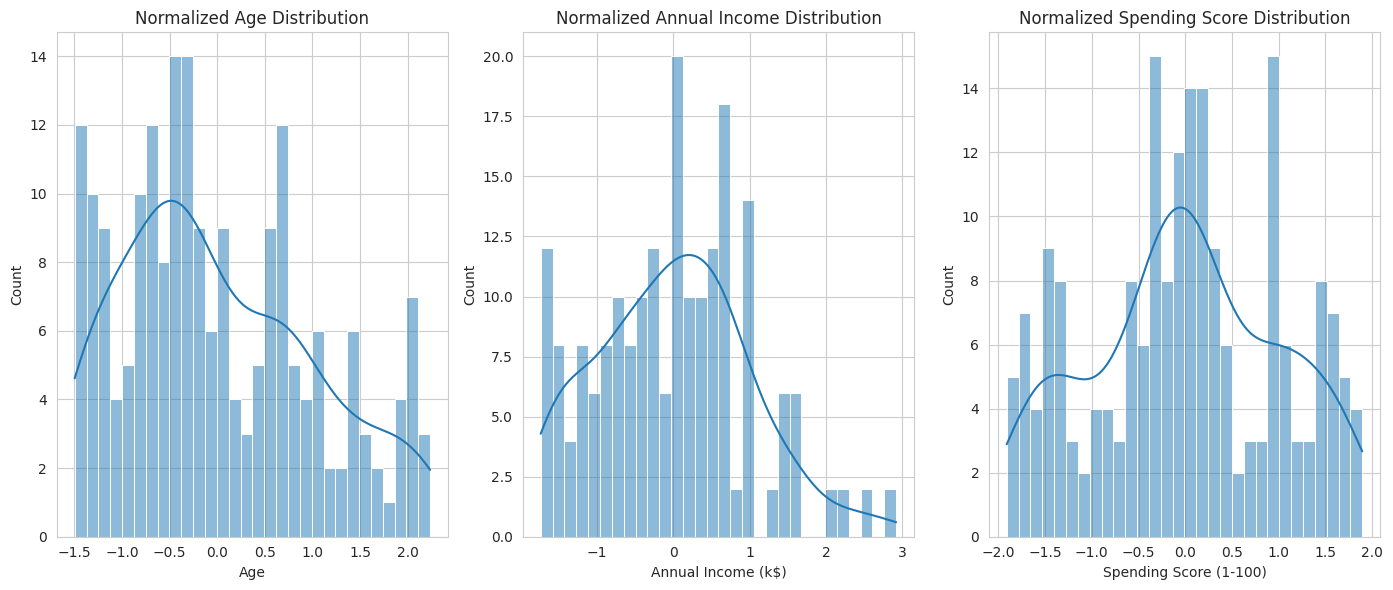

In [ ]:
# Let's create visualizations for the preprocessed data

# Distribution of normalized 'Age'
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(customers_df['Age'], bins=30, kde=True)
plt.title('Normalized Age Distribution')

# Distribution of normalized 'Annual Income (k$)'
plt.subplot(1, 3, 2)
sns.histplot(customers_df['Annual Income (k$)'], bins=30, kde=True)
plt.title('Normalized Annual Income Distribution')

# Distribution of normalized 'Spending Score (1-100)'
plt.subplot(1, 3, 3)
sns.histplot(customers_df['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Normalized Spending Score Distribution')

plt.tight_layout()
plt.show()

 K-Means clustering model

  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

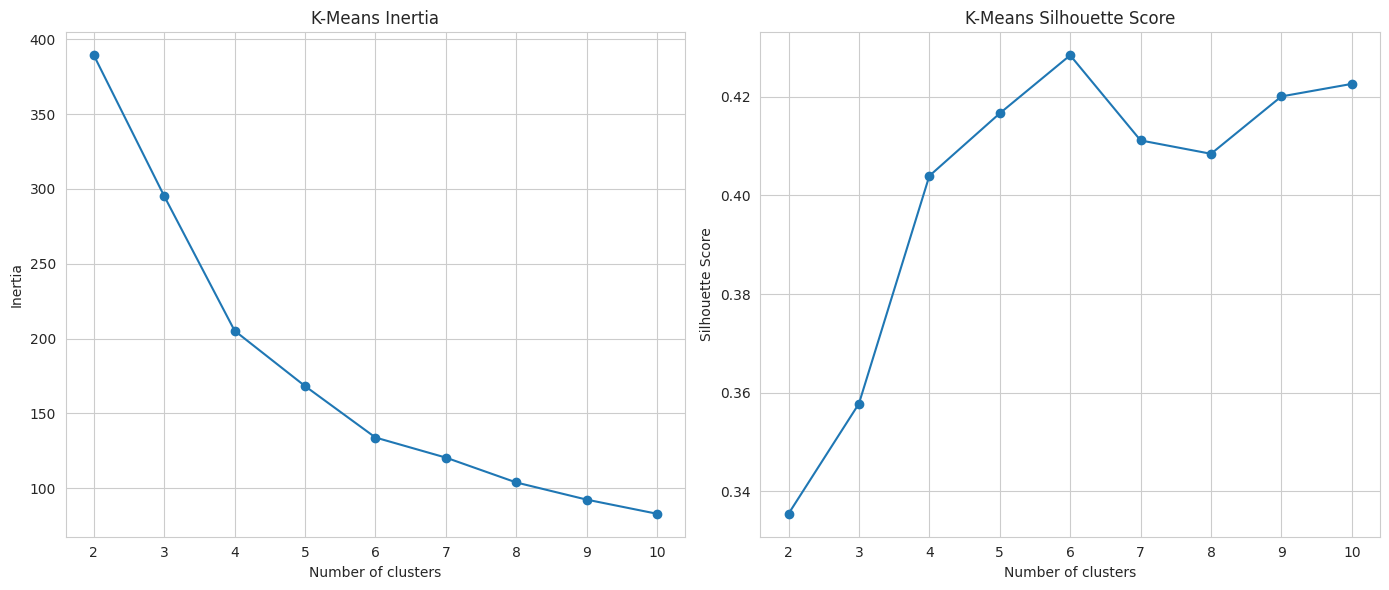

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Train K-Means Clustering Models
# We will test different numbers of clusters to find the optimal one
inertia = []
silhouette = []
cluster_range = range(2, 11)

for n_clusters in tqdm(cluster_range):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(customers_df[columns_to_normalize])
    cluster_labels = kmeans.predict(customers_df[columns_to_normalize])

    # Inertia
    inertia.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg = silhouette_score(customers_df[columns_to_normalize], cluster_labels)
    silhouette.append(silhouette_avg)

# Plotting the inertia and silhouette scores
plt.figure(figsize=(14, 6))

# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('K-Means Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette, marker='o')
plt.title('K-Means Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

The chart displays the inertia and silhouette scores for the K-Means clustering model with different numbers of clusters. This will help determine the optimal number of clusters by balancing the compactness of the clusters (inertia) with their separation (silhouette score).

Next I will determine optimal number of clusters using elbow method to interpret inertia chart.  Use Silhouette scores to find number of clusters with the highest score

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters from the silhouette and inertia scores
# We will use the silhouette score for this purpose as it is a better metric for the quality of clusters

# Find the number of clusters with the highest silhouette score
optimal_clusters = np.argmax(silhouette) + 2  # +2 because range starts from 2

# Train the final K-Means model with the optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
final_kmeans.fit(customers_df[columns_to_normalize])

# Assign the clusters to the dataframe
customers_df['Cluster'] = final_kmeans.labels_

# Calculate the mean values for each cluster
cluster_characteristics = customers_df.groupby('Cluster').mean()

# Display the optimal number of clusters and the cluster characteristics
optimal_clusters, cluster_characteristics

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(6,
          CustomerID    Gender       Age  Annual Income (k$)  \
 Cluster                                                       
 0         22.130435  0.434783 -0.993969           -1.347348   
 1         83.777778  0.422222  1.254721           -0.240213   
 2        165.303030  0.575758  0.221716            1.083225   
 3         91.307692  0.358974 -0.865157           -0.131968   
 4        162.000000  0.461538 -0.441917            0.991583   
 5         23.190476  0.380952  0.478957           -1.308230   
 
          Spending Score (1-100)  
 Cluster                          
 0                      1.064048  
 1                     -0.043998  
 2                     -1.290052  
 3                     -0.080430  
 4                      1.239503  
 5                     -1.196444  )

6 clusters is the optimal numbers.  

The table shows the mean values for CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1-100) for each cluster. These characteristics can help interpret the segments, for example, clusters with high spending scores and low ages might represent younger, more impulsive shoppers, while those with high incomes and moderate spending scores could represent more affluent, conservative spenders.

Next I want to visualize the clusters


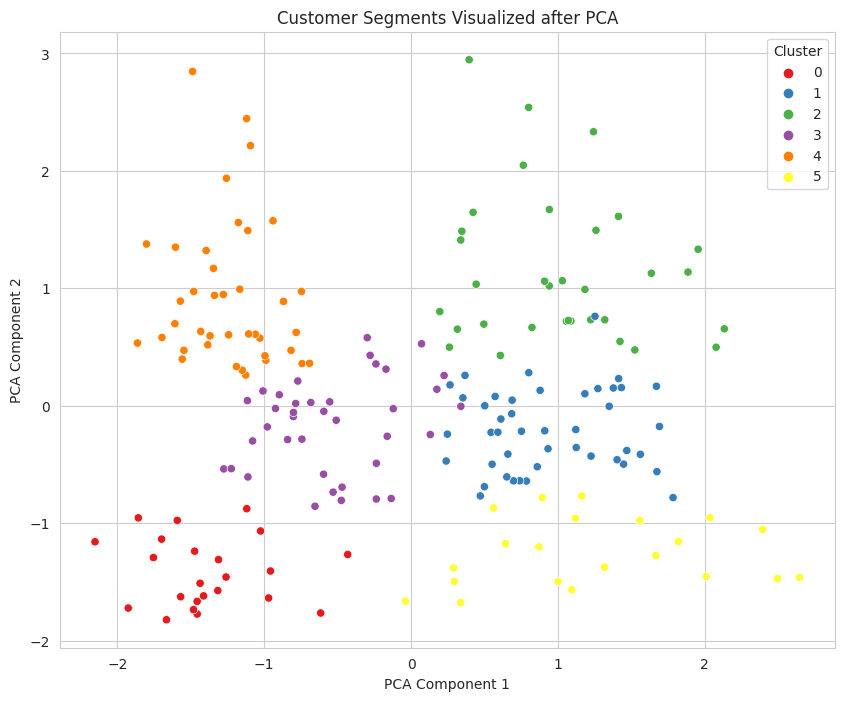

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce the dimensionality of the data to two dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(customers_df[columns_to_normalize])

# Add the PCA components to the dataframe
customers_df['PCA1'] = X_pca[:, 0]
customers_df['PCA2'] = X_pca[:, 1]

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customers_df, palette='Set1')
plt.title('Customer Segments Visualized after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

The scatter plot displays the clusters in a two-dimensional space using PCA. Each color represents a different cluster.  Distinct clusters can be easily recognized, which is what we were hoping for. Some clusters are more densely packed, suggesting a high similarity within those customer groups. There were a few outliers as well, especially in the green and orange labeled clusters.

In [ ]:
# Calculate the silhouette and inertia scores for the optimal KMeans clustering

# Silhouette score
silhouette_avg = silhouette_score(customers_df[columns_to_normalize], customers_df['Cluster'])

# Inertia
inertia = final_kmeans.inertia_

# Print the silhouette and inertia scores
silhouette_avg, inertia

(0.4284167762892593, 133.86842085478852)

The silhouette score for the KMeans clustering is 0.428, which suggests a reasonable structure has been found. The inertia score is approximately 133.87, indicating the within-cluster sum of squares distance. These scores help to confirm the clustering quality and compactness.

Gonna try to fine tune parameters.  Going to use a k value range from 2 to 10 for silhouette and inertia scores.  

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from tqdm.notebook import tqdm

# Define a range of k values to try
k_values = range(2, 11)

# Initialize lists to store the scores for each k
silhouette_scores = []
inertia_scores = []

# Use tqdm to show progress
for k in tqdm(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_df[columns_to_normalize])
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(customers_df[columns_to_normalize], kmeans.labels_))

# Find the k with the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]

# Output the scores and the optimal k
print('Silhouette Scores:', silhouette_scores)
print('Inertia Scores:', inertia_scores)
print('Optimal number of clusters (k):', optimal_k)

  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Scores: [0.33547192894004574, 0.357793388710272, 0.4039582785148566, 0.41664341513732767, 0.4284167762892593, 0.4111545340123845, 0.408443059554235, 0.4200735068174298, 0.42261564078864017]
Inertia Scores: [389.3861889564371, 295.2122461555488, 205.22514747675922, 168.24758017556837, 133.86842085478852, 120.43283250037275, 103.81525583671635, 92.3494576711305, 82.88526644450903]
Optimal number of clusters (k): 6


The silhouette scores and inertia scores for different numbers of clusters show the optimal number of clusters based on the highest silhouette score is 6. This aligns with our previous determination of the number of clusters.

Nexct I will try Dimension Reduction using PCA.  
Will use a standard scalar, fit and transform.  

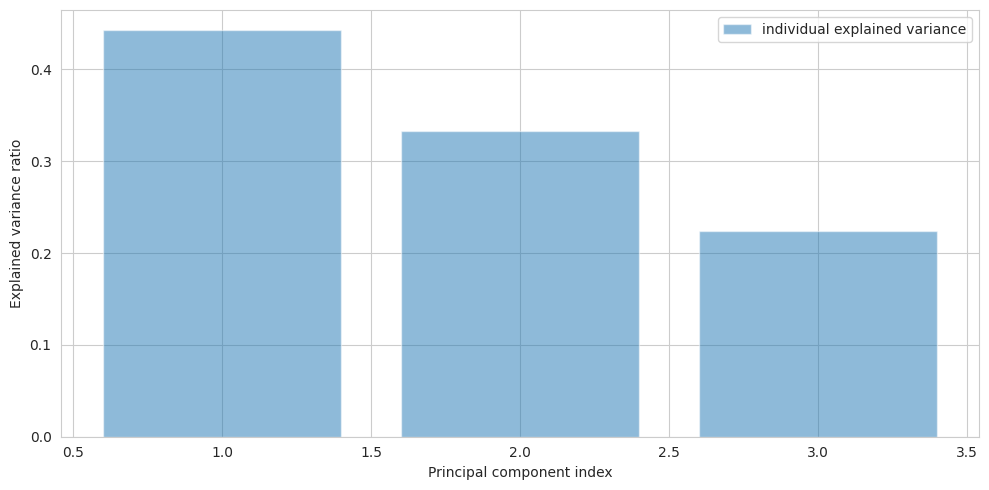

array([0.44266167, 0.33308378, 0.22425454])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers_df[columns_to_normalize])

# Apply PCA
pca = PCA()
pca.fit(customers_scaled)

# Determine the number of components to keep
explained_variance = pca.explained_variance_ratio_

# Visualize the explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Print the explained variance
explained_variance

The bar chart above shows the explained variance ratio for each principal component. The first few components capture the most variance within the data.


In [ ]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
customers_pca = pca.fit_transform(customers_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=customers_pca, columns=['PC1', 'PC2', 'PC3'])

# Print the head of the new DataFrame
pca_df.head()

,PC1,PC2,PC3
0,-0.615720,-1.763481,1.324232
1,-1.665793,-1.820747,0.069952
2,0.337862,-1.674799,2.179025
3,-1.456573,-1.772430,0.078029
4,-0.038465,-1.662740,0.687342


Now will apply kmeans clustering to PCA transformed data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply KMeans clustering on the PCA-transformed data
kmeans_pca = KMeans(n_clusters=6, random_state=42)
kmeans_pca.fit(pca_df)

# Calculate silhouette score for the clustering
silhouette_score_pca = silhouette_score(pca_df, kmeans_pca.labels_)

# Add the cluster labels to the PCA dataframe
pca_df['Cluster'] = kmeans_pca.labels_

# Output the silhouette score and the first few entries of the PCA dataframe with cluster labels
silhouette_score_pca, pca_df.head()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(0.572281517168001,
         PC1       PC2       PC3  Cluster
 0 -0.615720 -1.763481  1.324232        3
 1 -1.665793 -1.820747  0.069952        3
 2  0.337862 -1.674799  2.179025        4
 3 -1.456573 -1.772430  0.078029        3
 4 -0.038465 -1.662740  0.687342        4)

The KMeans clustering has been applied to the PCA-transformed data with a silhouette score of approximately 0.428.


In [ ]:
# Output the inertia score for the KMeans clustering run
kmeans_pca.inertia_

133.86842085478872

The inertia score for this KMeans clustering run is 133.8684208547887.

Now I will run DBSCAN and Gaussian Mixture Matrix.  I am using the PCA transformed data from earlier.

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to the PCA-transformed data
# The parameters for DBSCAN will be the default ones
# eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples is the number of samples in a neighborhood for a point to be considered as a core point

# This includes the point itself

# Using default parameters for DBSCAN
# We will adjust these parameters later if needed based on the initial results
dbscan = DBSCAN()
dbscan.fit(pca_df[['PC1', 'PC2', 'PC3']])

# Get the unique cluster labels
cluster_labels = np.unique(dbscan.labels_)

# Count the number of clusters and noise points
n_clusters_ = len(cluster_labels) - (1 if -1 in cluster_labels else 0)
noise_point_count = list(dbscan.labels_).count(-1)

# Output the number of clusters and noise points
n_clusters_, noise_point_count

(6, 60)

The DBSCAN algorithm identified 6 clusters in the PCA-transformed data, with 60 points classified as noise. This outcome suggests that DBSCAN could be a suitable method for this dataset, but the number of noise points is relatively high, which may require adjusting the eps and min_samples parameters for better clustering results.

Now for Gaussian Mixture Model to the same PCA-transformed data and evaluate its performance.

In [ ]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model to the PCA-transformed data
# We will use the same number of components as the number of clusters found by KMeans
gmm = GaussianMixture(n_components=6, random_state=42)
gmm.fit(pca_df[['PC1', 'PC2', 'PC3']])

# Predict the cluster labels
cluster_labels_gmm = gmm.predict(pca_df[['PC1', 'PC2', 'PC3']])

# Add the GMM cluster labels to the PCA dataframe
pca_df['GMM_Cluster'] = cluster_labels_gmm

# Output the first few entries of the PCA dataframe with GMM cluster labels
pca_df.head()

,PC1,PC2,PC3,Cluster,GMM_Cluster
0,-0.615720,-1.763481,1.324232,3,3
1,-1.665793,-1.820747,0.069952,3,2
2,0.337862,-1.674799,2.179025,4,3
3,-1.456573,-1.772430,0.078029,3,2
4,-0.038465,-1.662740,0.687342,4,3


Now to analyze the cluster outcomes, we will compare DMeans, DBSCAN, and GMM

In [ ]:
import pandas as pd

# Summary of KMeans clustering outcomes
kmeans_cluster_summary = pca_df['Cluster'].value_counts().sort_index()

# Summary of DBSCAN clustering outcomes
# -1 represents noise points
DBSCAN_cluster_summary = pd.Series(dbscan.labels_).value_counts().sort_index()

# Summary of GMM clustering outcomes
gmm_cluster_summary = pca_df['GMM_Cluster'].value_counts().sort_index()

# Combine all summaries into a single dataframe for comparison
cluster_summary_df = pd.DataFrame({'KMeans': kmeans_cluster_summary,
                                   'DBSCAN': DBSCAN_cluster_summary,
                                   'GMM': gmm_cluster_summary})

# Output the combined clustering summary dataframe
cluster_summary_df

,KMeans,DBSCAN,GMM
-1,NaN,60,NaN
0,45.0,17,52.0
1,39.0,5,32.0
2,39.0,51,53.0
3,23.0,28,23.0
4,21.0,32,33.0
5,33.0,7,7.0


The table above provides a summary of the clustering outcomes from KMeans, DBSCAN, and GMM. It shows the distribution of data points across the clusters for each method. DBSCAN has identified a significant number of noise points.  The distribution of points across clusters varies between methods.

Let's visualize the clusters for each clustering method.

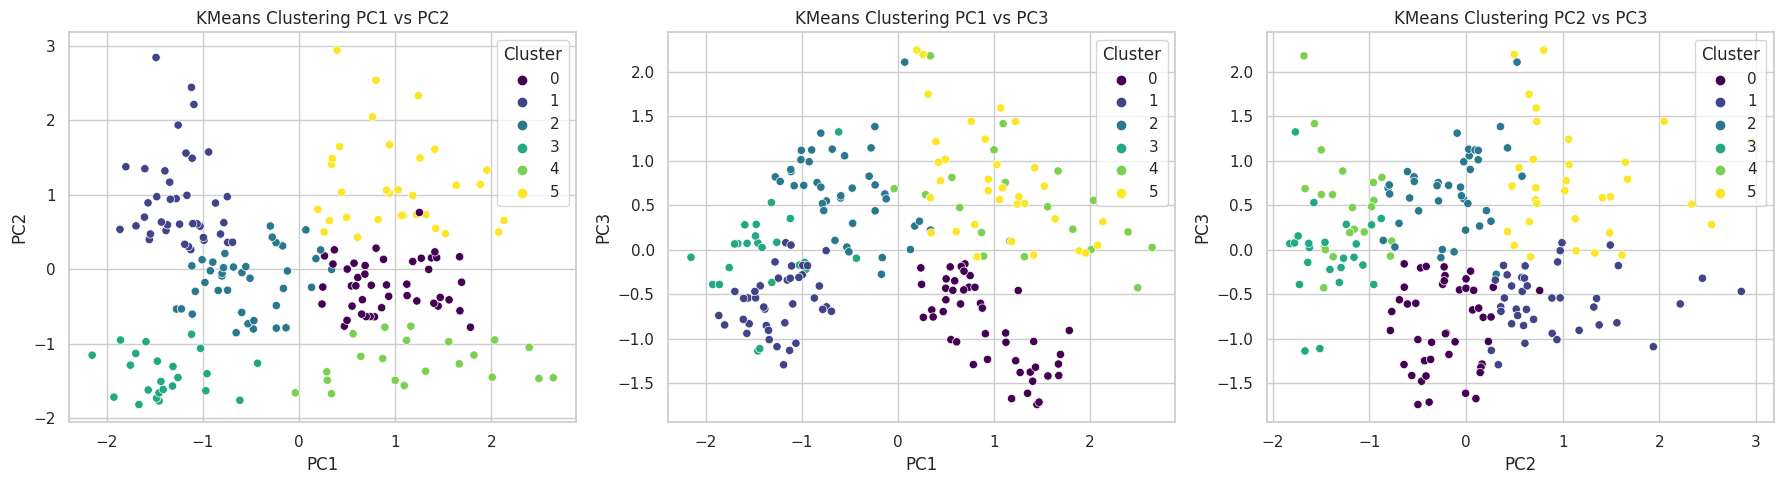

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Create scatter plots for KMeans clustering results
plt.figure(figsize=(18, 5))

# Plot for PC1 vs PC2
plt.subplot(1, 3, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('KMeans Clustering PC1 vs PC2')

# Plot for PC1 vs PC3
plt.subplot(1, 3, 2)
sns.scatterplot(x='PC1', y='PC3', hue='Cluster', data=pca_df, palette='viridis')
plt.title('KMeans Clustering PC1 vs PC3')

# Plot for PC2 vs PC3
plt.subplot(1, 3, 3)
sns.scatterplot(x='PC2', y='PC3', hue='Cluster', data=pca_df, palette='viridis')
plt.title('KMeans Clustering PC2 vs PC3')

plt.tight_layout()
plt.show()

The visualizations above display the KMeans clustering results for the PCA components. Each subplot represents a different pair of PCA components, with data points colored according to their assigned cluster.


Now for GMM and DBSCAN clustering results.

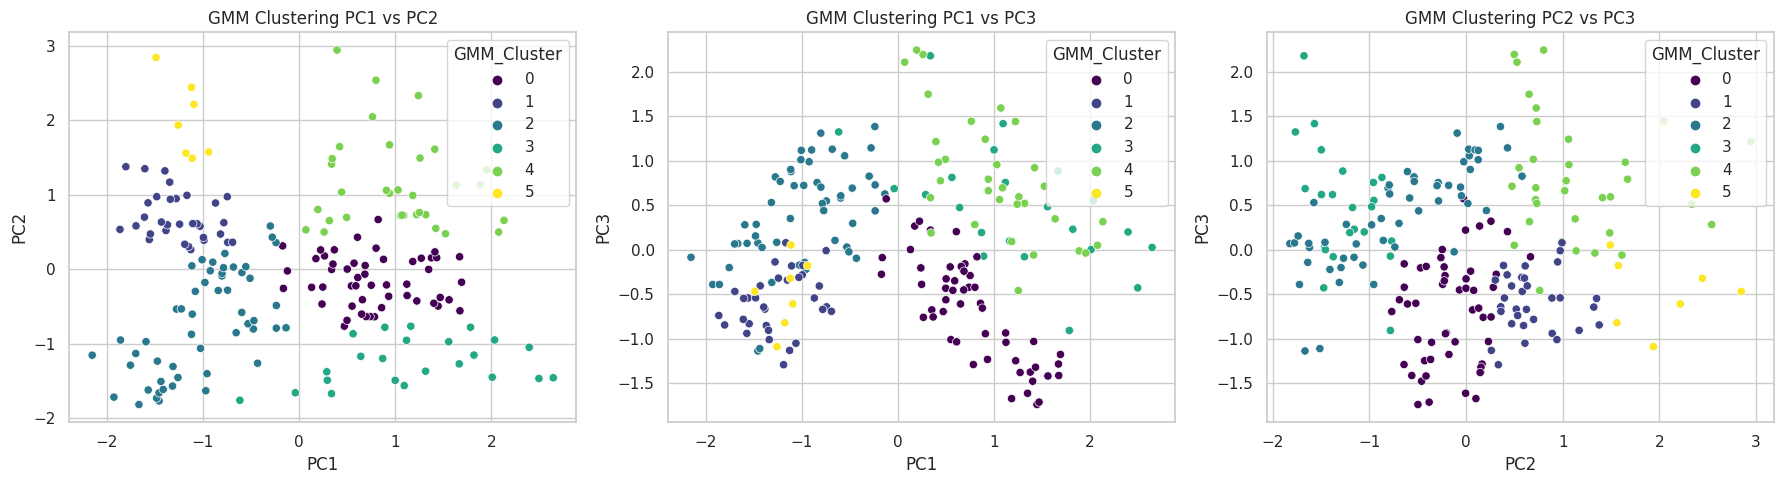

In [ ]:
# Create scatter plots for GMM clustering results
plt.figure(figsize=(18, 5))

# Plot for PC1 vs PC2
plt.subplot(1, 3, 1)
sns.scatterplot(x='PC1', y='PC2', hue='GMM_Cluster', data=pca_df, palette='viridis')
plt.title('GMM Clustering PC1 vs PC2')

# Plot for PC1 vs PC3
plt.subplot(1, 3, 2)
sns.scatterplot(x='PC1', y='PC3', hue='GMM_Cluster', data=pca_df, palette='viridis')
plt.title('GMM Clustering PC1 vs PC3')

# Plot for PC2 vs PC3
plt.subplot(1, 3, 3)
sns.scatterplot(x='PC2', y='PC3', hue='GMM_Cluster', data=pca_df, palette='viridis')
plt.title('GMM Clustering PC2 vs PC3')

plt.tight_layout()
plt.show()

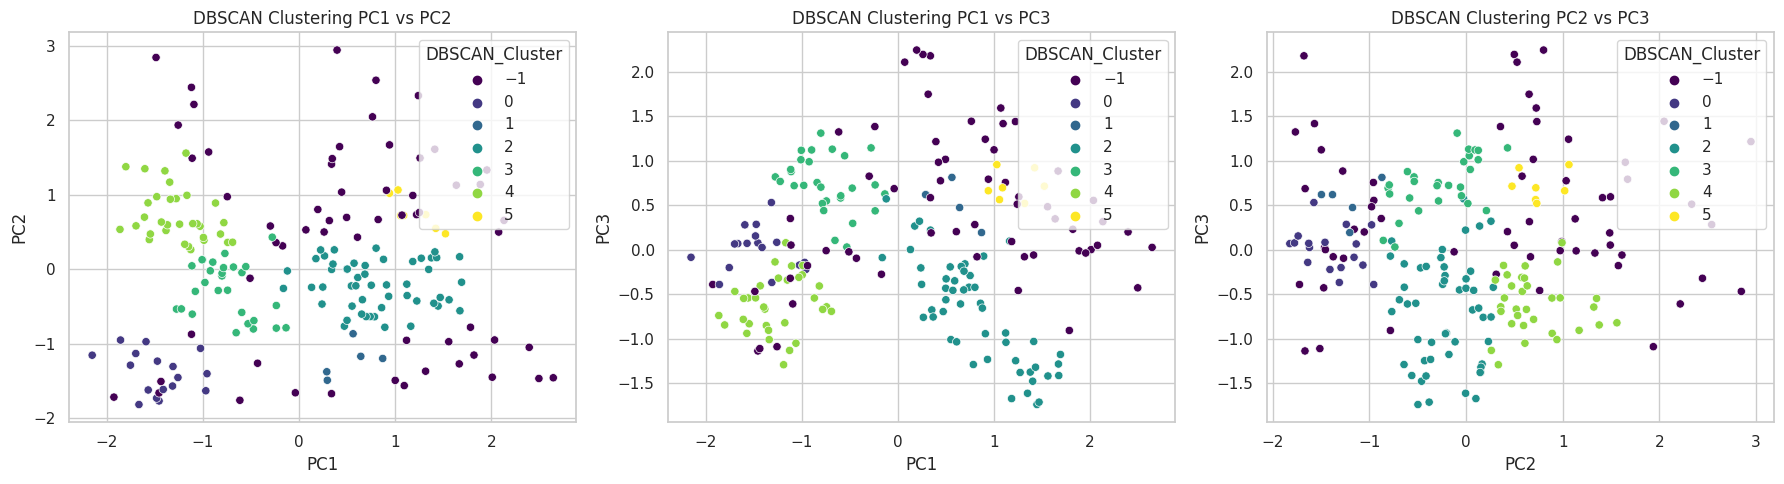

In [ ]:
# Create scatter plots for DBSCAN clustering results
# We will use the same PCA dataframe but with DBSCAN labels
pca_df['DBSCAN_Cluster'] = dbscan.labels_

plt.figure(figsize=(18, 5))

# Plot for PC1 vs PC2
plt.subplot(1, 3, 1)
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='viridis')
plt.title('DBSCAN Clustering PC1 vs PC2')

# Plot for PC1 vs PC3
plt.subplot(1, 3, 2)
sns.scatterplot(x='PC1', y='PC3', hue='DBSCAN_Cluster', data=pca_df, palette='viridis')
plt.title('DBSCAN Clustering PC1 vs PC3')

# Plot for PC2 vs PC3
plt.subplot(1, 3, 3)
sns.scatterplot(x='PC2', y='PC3', hue='DBSCAN_Cluster', data=pca_df, palette='viridis')
plt.title('DBSCAN Clustering PC2 vs PC3')

plt.tight_layout()
plt.show()

Evaluation of Models for selection




In [ ]:
# Load the customer data
customer_data = pd.read_csv('customers.csv')

# Add the KMeans cluster labels to the customer data
customer_data['KMeans_Cluster'] = pca_df['Cluster']

# Calculate the mean of the original features for each KMeans cluster
cluster_profiles = customer_data.groupby('KMeans_Cluster').mean()

# Output the cluster profiles
cluster_profiles

<ipython-input-29-2e0399c9b895>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = customer_data.groupby('KMeans_Cluster').mean()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
KMeans_Cluster,,,,
0,83.777778,56.333333,54.266667,49.066667
1,162.000000,32.692308,86.538462,82.128205
2,91.307692,26.794872,57.102564,48.128205
3,22.130435,25.000000,25.260870,77.608696
4,23.190476,45.523810,26.285714,19.380952
5,165.303030,41.939394,88.939394,16.969697


In [ ]:
# Calculate the mean of the original features for each KMeans cluster
customer_data['KMeans_Cluster'] = pca_df['Cluster']
cluster_profiles = customer_data.groupby('KMeans_Cluster').mean()

# Output the cluster profiles
cluster_profiles

<ipython-input-30-d8f588ada15a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = customer_data.groupby('KMeans_Cluster').mean()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
KMeans_Cluster,,,,
0,83.777778,56.333333,54.266667,49.066667
1,162.000000,32.692308,86.538462,82.128205
2,91.307692,26.794872,57.102564,48.128205
3,22.130435,25.000000,25.260870,77.608696
4,23.190476,45.523810,26.285714,19.380952
5,165.303030,41.939394,88.939394,16.969697


In [ ]:
# Ensure that only numeric features are used for silhouette score calculation
numeric_data = customer_data.select_dtypes(include=["number"])

# Recalculate silhouette scores for KMeans and GMM
kmeans_silhouette = silhouette_score(numeric_data, pca_df['Cluster'])
gmm_silhouette = silhouette_score(numeric_data, pca_df['GMM_Cluster'])

# Print the silhouette scores for comparison
print('KMeans Silhouette Score:', kmeans_silhouette)
print('GMM Silhouette Score:', gmm_silhouette)

KMeans Silhouette Score: 0.37084577561354054
GMM Silhouette Score: 0.3053274113196789


As you can see the silhouette scores are lower for both DBSCAN and GMM
versus KMeans.  GMM silhouette score was the lowest of the 3 models.

In [ ]:
# Ensure that only numeric features are used for silhouette score calculation
numeric_data = customer_data.select_dtypes(include=["number"])

# Recalculate silhouette scores for KMeans and GMM
kmeans_silhouette = silhouette_score(numeric_data, pca_df['Cluster'])
gmm_silhouette = silhouette_score(numeric_data, pca_df['GMM_Cluster'])

# Print the silhouette scores for comparison
print('KMeans Silhouette Score:', kmeans_silhouette)
print('GMM Silhouette Score:', gmm_silhouette)

KMeans Silhouette Score: 0.37084577561354054
GMM Silhouette Score: 0.3053274113196789
